   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')
Confusion Matrix:
[[65  3]
 [ 8 24]]
Accuracy: 89.00%
Error Rate: 11.00%
Precision: 0.89
Recall: 0.75


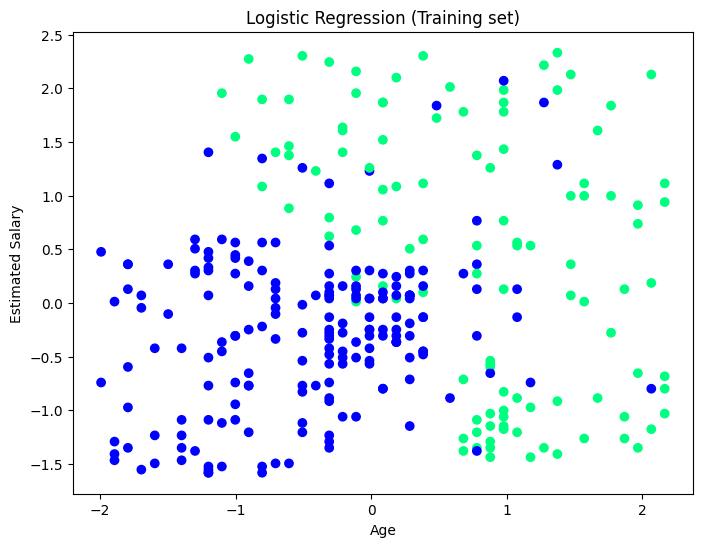

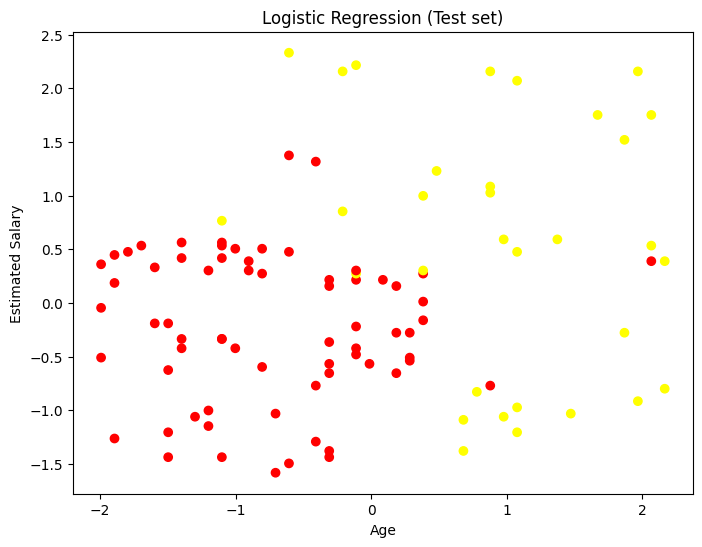

In [43]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


dataset = pd.read_csv('Social_Network_Ads.csv')


print(dataset.head())
print(dataset.columns)



X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

error_rate = 1 - accuracy
print(f'Error Rate: {error_rate * 100:.2f}%')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')


plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn')
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()
